In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [245]:
df = pd.read_csv('superlig.csv')

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5272 entries, 0 to 5271
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Takım             5272 non-null   object 
 1   matchdate turkce  5272 non-null   object 
 2   Comp Short        5272 non-null   object 
 3   Hafta             5272 non-null   int64  
 4   Season            5272 non-null   int64  
 5   Season long       5272 non-null   object 
 6   Match Date        5272 non-null   object 
 7   Matchid           5272 non-null   object 
 8   Max date          5272 non-null   object 
 9   month turkce      5272 non-null   object 
 10  GD                5272 non-null   int64  
 11  Goals Agst        5272 non-null   int64  
 12  Goals For         5272 non-null   int64  
 13  Maç               5272 non-null   int64  
 14  Points            5272 non-null   int64  
 15  points gd2        5272 non-null   int64  
 16  X Gd              5272 non-null   float64


In [247]:
df.head()

,Takım,matchdate turkce,Comp Short,Hafta,Season,Season long,Match Date,Matchid,Max date,month turkce,GD,Goals Agst,Goals For,Maç,Points,points gd2,X Gd,X Goals Agst,X Goals For,xPoints bucket
0,Akhisarspor,30 Mayıs 2015,TUR,1,1415,2014-15,8/29/2014,BLKAKH1415,5/30/2015,Mayıs,1,1,2,1,3,301,0.560972,0.483106,1.044078,1.832432
1,Akhisarspor,30 Mayıs 2015,TUR,2,1415,2014-15,9/15/2014,AKHSIV1415,5/30/2015,Mayıs,0,2,2,1,1,100,0.026642,0.963886,0.990529,1.350186
2,Akhisarspor,30 Mayıs 2015,TUR,3,1415,2014-15,9/20/2014,KYEAKH1415,5/30/2015,Mayıs,1,1,2,1,3,301,0.833107,0.653289,1.486396,2.209984
3,Akhisarspor,30 Mayıs 2015,TUR,4,1415,2014-15,9/28/2014,AKHFEN1415,5/30/2015,Mayıs,2,0,2,1,3,302,0.048906,1.015609,1.064514,1.350186
4,Akhisarspor,30 Mayıs 2015,TUR,5,1415,2014-15,10.05.14,BSKAKH1415,5/30/2015,Mayıs,-4,4,0,1,0,-4,-1.855734,2.440619,0.584886,0.169811


### Goals per Game vs Points per Game

In [248]:
season = pd.DataFrame(df.groupby(['Season','Goals For'])['Points'].sum() / df.groupby(['Season','Goals For'])['Goals For'].count())

In [249]:
df = pd.DataFrame(df.groupby('Goals For')['Points'].sum() / df.groupby('Goals For')['Goals For'].count())

In [250]:
df.reset_index(inplace=True)

In [251]:
df.rename(columns={'Goals For':'Goals',0:'Points'},inplace=True)

In [355]:
df

,Goals,Points,Marginal Points
0,0,0.275556,0.000000
1,1,1.068330,0.792774
2,2,2.049834,0.981504
3,3,2.673077,0.623243
4,4,2.919786,0.246709
5,5,3.000000,0.080214
6,6,3.000000,0.000000
7,7,3.000000,0.000000


In [451]:
df['Points'].round(2).tolist()

0    0.28
1    1.07
2    2.05
3    2.67
4    2.92
5    3.00
6    3.00
7    3.00
Name: Points, dtype: float64

In [468]:
df['Points'].round(2).tolist()[:6]

[0.28, 1.07, 2.05, 2.67, 2.92, 3.0]

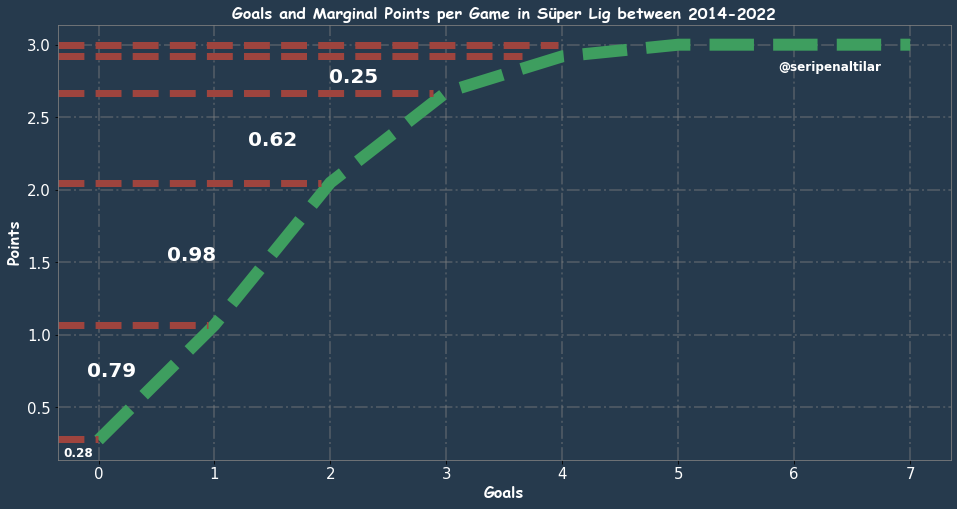

In [538]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#263a4d')

plt.plot(df['Goals'],df['Points'],lw=12,ls='dashed',c='#3e9e5f')

ax.set_facecolor(color='#263a4d')
ax.spines[['left','bottom','right','top']].set_color('grey')

ax.grid(b = True, color ='grey',
            linestyle ='-.', linewidth = 2,
            alpha = 0.4)

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

xv = df['Points'].round(2).tolist()[:6]
yv = [0.045,0.168,0.295,0.42,0.52,0.56]
xyv = dict(zip(xv,yv))

for k,v in xyv.items():
    plt.axhline(y=k, xmin=0, xmax=v,lw=7,ls='--',c='#9e443e')


ax.set_xlabel('Goals', fontdict=font)
ax.set_ylabel('Points', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')
plt.title("Goals and Marginal Points per Game in Süper Lig between 2014-2022",fontdict=font)

plt.figtext(0.75,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')

val = df['Marginal Points'][1:5].round(2).to_list()
xt = [0.15,0.22,0.29,0.36]
yt = [0.27,0.47,0.67,0.78]

for (a, b, c) in zip(xt, yt, val):
    plt.figtext(a,b,c,fontsize=20,fontweight='bold',color='white')
    
plt.figtext(0.13,0.13,'0.28',fontsize=12,fontweight='bold',color='white')

plt.show()

### Marginal Points

In [254]:
df['Marginal Points']=df.diff()['Points']

In [255]:
df = df.fillna(0)

In [256]:
bar = df[df['Marginal Points']!=0]

In [257]:
bar = bar.round(2)

In [258]:
bar.groupby('Goals')['Marginal Points'].size()

Goals
1    1
2    1
3    1
4    1
5    1
Name: Marginal Points, dtype: int64

In [259]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

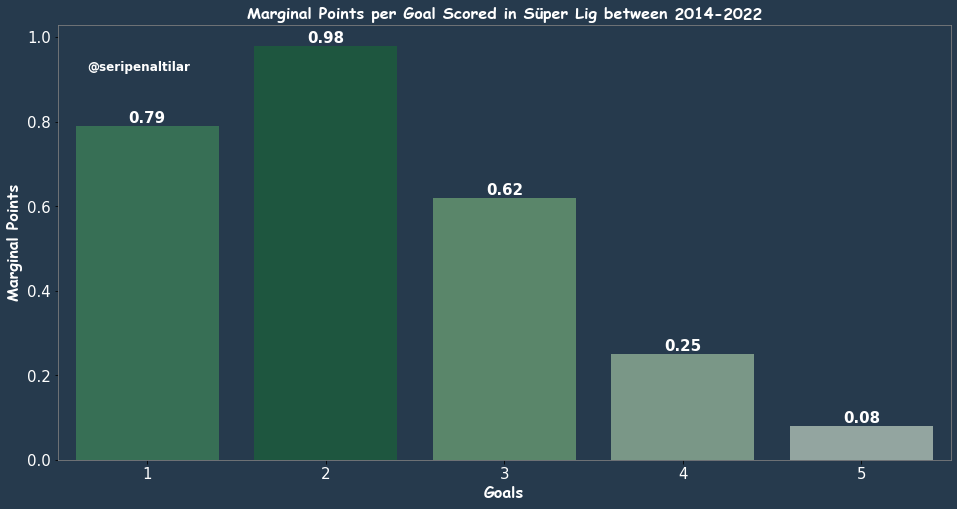

In [260]:
fig,ax = plt.subplots(figsize=(16,8))
fig.patch.set_facecolor('#263a4d')
y = bar['Marginal Points']
ax = sns.barplot(x="Goals", y="Marginal Points", data=bar,palette=colors_from_values(y, "Greens"),alpha=0.6)

ax.set_facecolor(color='#263a4d')
ax.spines[['left','bottom','right','top']].set_color('grey')
ax.bar_label(ax.containers[0],color='white',size=15,fmt='%g',weight='bold')

font = {'family': 'Comic Sans MS',
       'color': 'white',
       'weight': 'bold',
       'size': 16
       }

ax.set_xlabel('Goals', fontdict=font)
ax.set_ylabel('Marginal Points', fontdict=font)
plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

plt.title("Marginal Points per Goal Scored in Süper Lig between 2014-2022",fontdict=font)

plt.figtext(0.15,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')
plt.show()

In [261]:
df

,Goals,Points,Marginal Points
0,0,0.275556,0.000000
1,1,1.068330,0.792774
2,2,2.049834,0.981504
3,3,2.673077,0.623243
4,4,2.919786,0.246709
5,5,3.000000,0.080214
6,6,3.000000,0.000000
7,7,3.000000,0.000000


In [264]:
goal = pd.read_csv('goals.csv')

In [288]:
goal['Marginal Point'] =  df[df['Goals']==1]['Marginal Points'].item() * goal['Goal 1'] + df[df['Goals']==2]['Marginal Points'].item() * goal['Goal 2'] +df[df['Goals']==3]['Marginal Points'].item() * goal['Goal 3'] + df[df['Goals']==4]['Marginal Points'].item() * goal['Goal 4'] + df[df['Goals']==5]['Marginal Points'].item() * goal['Goal 5'] +df[df['Goals']==6]['Marginal Points'].item() * goal['Goal 6'] +df[df['Goals']==7]['Marginal Points'].item() * goal['Goal 7']

In [310]:
goal['goal'] = goal.iloc[:,2:-2].sum(axis=1)

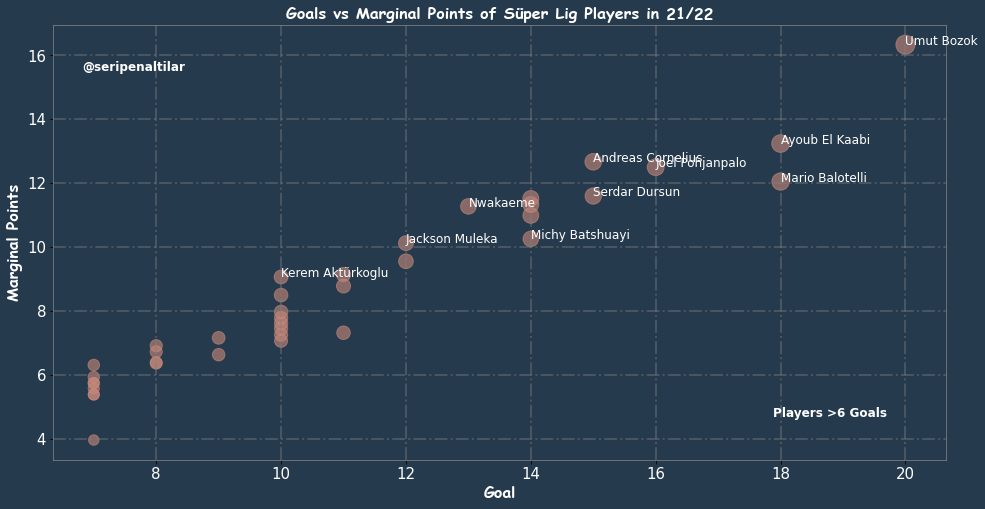

In [540]:
fig, ax = plt.subplots(figsize=(16,8))

fig.patch.set_facecolor('#263a4d')
ax.set_facecolor(color='#263a4d')

ax.scatter(goal['goal'],goal['Marginal Point'],s=(goal['goal'] + goal['Marginal Point'])*10,c='#c9897b',alpha=0.6)

pa = ['Umut Bozok','Jackson Muleka','Mario Balotelli','Michy Batshuayi','Nwakaeme','Serdar Dursun','Andreas Cornelius',
     'Kerem Aktürkoglu','Ayoub El Kaabi','Joel Pohjanpalo']

for name in pa:
    ax.annotate(name,(goal[goal['Player']==name]['goal'],goal[goal['Player']==name]['Marginal Point']),c='white',size=12)


ax.spines[['left','bottom','right','top']].set_color('grey')
ax.grid(b=True,color='grey',
       linestyle='-.',linewidth=2,
       alpha=0.4)

font = {'family':'Comic Sans MS',
       'color':'white',
       'weight':'bold',
       'size':16}

ax.set_xlabel('Goal',fontdict=font)
ax.set_ylabel('Marginal Points',fontdict=font)

plt.xticks(fontsize=15,c='white')
plt.yticks(fontsize=15,c='white')

plt.title('Goals vs Marginal Points of Süper Lig Players in 21/22',fontdict=font)
plt.figtext(0.15,0.80,"@seripenaltilar",fontsize=12,fontweight='bold',color='white')
plt.figtext(0.75,0.20,"Players >6 Goals",fontsize=12,fontweight='bold',color='white')

plt.show()